### DATA WRANGLING

In [1]:
# importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [2]:
# reading the dataset

df=pd.read_csv('data.csv')
df.head()

,Ad No,Assembly,Name,Model Year,Mileage,Engine Capacity,Engine Type,Registered City,Transmission,Price,Last Updated
0,9307839,Local,Toyota Yaris ATIV X CVT 1.5 2021,2021,31000,1500 cc,Petrol,Karachi,Automatic,4700000.0,"Oct 16, 2024"
1,9322120,Local,Suzuki Cultus Auto Gear Shift 2021,2021,89000,1000 cc,Petrol,Rawalpindi,Automatic,3550000.0,"Oct 16, 2024"
2,9322123,Local,Honda City 1.3 i-VTEC 2015,2015,152568,1300 cc,Petrol,Lahore,Manual,3000000.0,"Oct 16, 2024"
3,9322068,Local,Honda Civic Oriel 1.8 i-VTEC CVT 2019,2019,114000,1800 cc,Petrol,Punjab,Automatic,5590000.0,"Oct 16, 2024"
4,9322127,Local,Toyota Corolla GLi Automatic 1.3 VVTi 2017,2017,135000,1300 cc,Petrol,Islamabad,Automatic,4250000.0,"Oct 16, 2024"


In [3]:
# selecting features to work on

df_car=df[['Name', 'Model Year', 'Mileage', 'Engine Capacity', 'Engine Type', 'Registered City', 'Transmission', 'Price']]
df_car

,Name,Model Year,Mileage,Engine Capacity,Engine Type,Registered City,Transmission,Price
0,Toyota Yaris ATIV X CVT 1.5 2021,2021,31000,1500 cc,Petrol,Karachi,Automatic,4700000.0
1,Suzuki Cultus Auto Gear Shift 2021,2021,89000,1000 cc,Petrol,Rawalpindi,Automatic,3550000.0
2,Honda City 1.3 i-VTEC 2015,2015,152568,1300 cc,Petrol,Lahore,Manual,3000000.0
3,Honda Civic Oriel 1.8 i-VTEC CVT 2019,2019,114000,1800 cc,Petrol,Punjab,Automatic,5590000.0
4,Toyota Corolla GLi Automatic 1.3 VVTi 2017,2017,135000,1300 cc,Petrol,Islamabad,Automatic,4250000.0
...,...,...,...,...,...,...,...,...
23489,Suzuki Mehran VXR Euro II 2015,2015,144000,796 cc,Petrol,Punjab,Manual,1280000.0
23490,Suzuki Cultus VXL 2018,2018,90528,1000 cc,Petrol,Sindh,Manual,2550000.0
23491,Toyota Hilux Revo V Automatic 2.8 2019,2019,83000,2800 cc,Diesel,Karachi,Automatic,10400000.0
23492,Toyota Corolla Altis Automatic 1.6 2015,2015,70000,1600 cc,Petrol,Lahore,Automatic,4230000.0


#### HANDLING NAME FEATURE

In [4]:
# Split the name into Make Model and variant features

df_car = df_car.copy() # used this to remove the SettingWithCopyWarning

df_car['name_split'] = df_car['Name'].str.split()

# Extract 'Make', 'Model', and 'Variant' from the split words:
df_car['Make'] = df_car['name_split'].apply(lambda x: x[0])
df_car['Model'] = df_car['name_split'].apply(lambda x: x[1])
df_car['Variant'] = df_car['name_split'].apply(lambda x: " ".join(x[2:-1]))

# Drop the temporary 'name_split' column and the original 'Name' column:
df_car = df_car.drop('name_split', axis=1)
df_car = df_car.drop('Name', axis=1)

In [5]:
# Group by 'Make' and get unique 'Model' values for each group
unique_models_by_make = df_car.groupby('Make')['Model'].unique()

# Display the result
print(unique_models_by_make)

Make
Adam                                                     [Revo]
Audi                                   [e-tron, A5, A3, A4, A6]
BAIC                                                     [BJ40]
BMW                                             [X1, 7, iX, i4]
Buick                                                 [Electra]
Changan       [Karvaan, Alsvin, Oshan, M9, Kaghan, M8, CX70T...
Chery                                                   [Tiggo]
DFSK                                    [Glory, Convoy, Rustom]
Daehan                                               [Shehzore]
Daihatsu                [Mira, Move, Boon, Rocky, Atrai, Hijet]
Deepal                                               [L07, S07]
FAW                                 [V2, X-PV, Carrier, Sirius]
Ford                                                    [Other]
GUGO                                                     [GIGI]
Haval                                              [H6, Jolion]
Hino                               

In [6]:
# Assuming you want to check if 'Make' column contains specific values
make_list = ['BAIC','Toyota', 'Honda', 'Changan', 'Chery', 'DFSK', 'Haval', 'Hyundai', 'KIA', 'MG', 'Peugeot', 'Prince', 'Proton', 'Suzuki', 'United']
df_filtered = df_car[df_car.Make.isin(make_list)]

# Group by 'Make' and get unique 'Model' values for each group
unique_models_by_make = df_filtered.groupby('Make')['Model'].unique()

# Display the result
print(unique_models_by_make)

Make
BAIC                                                  [BJ40]
Changan    [Karvaan, Alsvin, Oshan, M9, Kaghan, M8, CX70T...
Chery                                                [Tiggo]
DFSK                                 [Glory, Convoy, Rustom]
Haval                                           [H6, Jolion]
Honda      [City, Civic, BR-V, HR-V, N, CR-Z, Accord, Vez...
Hyundai    [Elantra, Tucson, Santa, Sonata, H-100, Grand,...
KIA        [Sportage, Picanto, Sorento, Shehzore, Stonic,...
MG                                               [HS, ZS, 4]
Peugeot                                       [2008, E-2008]
Prince                                     [Pearl, K07, K01]
Proton                                           [Saga, X70]
Suzuki     [Cultus, Alto, Mehran, Wagon, Swift, Bolan, Ci...
Toyota     [Yaris, Corolla, Hilux, Fortuner, Prius, Land,...
United                                        [Bravo, Alpha]
Name: Model, dtype: object


In [7]:
makes_to_display = ['Changan', 'Honda', 'Hyundai', 'KIA', 'Toyota', 'Suzuki']

for make in makes_to_display:
  if make in unique_models_by_make:
    print(f"Models for {make}: {unique_models_by_make[make]}")
  else:
    print(f"No models found for {make}")

Models for Changan: ['Karvaan' 'Alsvin' 'Oshan' 'M9' 'Kaghan' 'M8' 'CX70T' 'Kalash' 'A800']
Models for Honda: ['City' 'Civic' 'BR-V' 'HR-V' 'N' 'CR-Z' 'Accord' 'Vezel' 'Fit' 'Life'
 'Other' 'Inspire']
Models for Hyundai: ['Elantra' 'Tucson' 'Santa' 'Sonata' 'H-100' 'Grand' 'Shehzore' 'H1']
Models for KIA: ['Sportage' 'Picanto' 'Sorento' 'Shehzore' 'Stonic' 'Grand']
Models for Toyota: ['Yaris' 'Corolla' 'Hilux' 'Fortuner' 'Prius' 'Land' 'Aqua' 'Prado' 'Rush'
 'Vitz' 'Passo' 'C-HR' 'Pixis' 'Harrier' 'Rav4' 'Wish']
Models for Suzuki: ['Cultus' 'Alto' 'Mehran' 'Wagon' 'Swift' 'Bolan' 'Ciaz' 'Ravi' 'Every'
 'Vitara' 'Liana' 'MR' 'Jimny' 'Carry' 'Mega' 'APV']


In [8]:
models_list = ['Karvaan', 'Alsvin', 'Oshan', 'City', 'Civic', 'BR-V', 'HR-V', 'Elantra', 'Tucson', 'Santa', 'Sonata', 'Sportage', 'Picanto',
               'Sorento', 'Stonic', 'Yaris', 'Corolla', 'Hilux', 'Fortuner', 'Cultus', 'Alto', 'Mehran', 'Wagon', 'Swift', 'Bolan', 'Bravo',
               'Saga', 'X70', '2008', 'E-2008', 'HS', 'ZS', 'Pearl', 'H6', 'Jolion', 'Glory', 'Tiggo', 'BJ40']

df_2 = df_car[df_car.Model.isin(models_list)]

In [9]:
unique_models_by_make = df_2.groupby('Make')['Model'].unique()

# Display the result
print(unique_models_by_make)

Make
BAIC                                            [BJ40]
Changan                       [Karvaan, Alsvin, Oshan]
Chery                                          [Tiggo]
DFSK                                           [Glory]
Haval                                     [H6, Jolion]
Honda                        [City, Civic, BR-V, HR-V]
Hyundai               [Elantra, Tucson, Santa, Sonata]
KIA               [Sportage, Picanto, Sorento, Stonic]
MG                                            [HS, ZS]
Peugeot                                 [2008, E-2008]
Prince                                         [Pearl]
Proton                                     [Saga, X70]
Suzuki     [Cultus, Alto, Mehran, Wagon, Swift, Bolan]
Toyota               [Yaris, Corolla, Hilux, Fortuner]
United                                         [Bravo]
Name: Model, dtype: object


#### HANDLING MAKE FEATURE

In [10]:
# '''
# Upon dividing the name feature, we identified distinct Make, Model, and Vairiant features.
# However, this approach caused an unintended consequence: certain car brands like Range Rover,
# Land Rover, and Mercedes Benz were inadvertently broken up, with their complete names scattered
# across different features. To address this, this additional handling was implemented
# '''

# # Handling the Range Rover make
# range_rover_make = df_car[df_car.Make == 'Range'].copy()
# range_rover_make.Make = 'Range Rover'
# range_rover_make.Model = range_rover_make.Variant.str.split().apply(lambda x: x[0])
# range_rover_make.Variant = range_rover_make.Variant.str.split().apply(lambda x: " ".join(x[1:]))

# # Handling the Land Rover make
# land_make = df_car[df_car.Make == 'Land'].copy()
# land_make.Make = 'Land Rover'
# land_make.Model = land_make.Variant.str.split().apply(lambda x: x[0])
# land_make.Variant = land_make.Variant.str.split().apply(lambda x: " ".join(x[1:]))

# # Handling the Mercedez Benz make
# mercedes_make = df_car[df_car.Make == 'Mercedes'].copy()
# mercedes_make.Make = 'Mercedes Benz'
# mercedes_make.Model = mercedes_make.Variant.str.split().apply(lambda x: " ".join(x[:2]))
# mercedes_make.Variant = mercedes_make.Variant.str.split().apply(lambda x: " ".join(x[2:]))

# # concating the results in the dataset
# df_car.loc[(df_car.Make=='Land')] = land_make
# df_car.loc[(df_car.Make=='Range')] = range_rover_make
# df_car.loc[(df_car.Make=='Mercedes')] = mercedes_make

# # df_car = pd.concat([df_car[df_car.Make != 'Land'], land_make], ignore_index=True)
# # df_car = pd.concat([df_car[df_car.Make != 'Range'], range_rover_make], ignore_index=True)
# # df_car = pd.concat([df_car[df_car.Make != 'Mercedes'], mercedes_make], ignore_index=True)


#### HANDLING MODEL AND VARIANT FEATURE

In [11]:
df_car = df_2.copy()

# '''
# We also encountered certain models represented by partial names within the
# "Model" and "Variant" features. To ensure complete and accurate representation,
# we implemented dedicatedd handling for these models
# '''

# # Handling the BMW Models
# bmw_model = df_car[df_car['Model'].isin(['1', '2', '3', '5', '7'])].copy()
# bmw_model['Model'] = bmw_model.apply(lambda row: row['Model'] + ' ' + row['Variant'].split()[0], axis=1)
# bmw_model['Variant'] = bmw_model.apply(lambda row: ' '.join(row['Variant'].split()[1:]), axis=1)

# # Handling the Land Cruiser Model
# landCruiser_model = df_car[df_car.Model == 'Land'].copy()
# landCruiser_model['Model'] = landCruiser_model.apply(lambda row: row['Model'] + ' ' + row['Variant'].split()[0], axis=1)
# landCruiser_model['Variant'] = landCruiser_model.apply(lambda row: ' '.join(row['Variant'].split()[1:]), axis=1)

# Handling the Wagon R Model
WagonR_model = df_car[df_car.Model == 'Wagon'].copy()
WagonR_model['Model'] = WagonR_model.apply(lambda row: row['Model'] + ' ' + row['Variant'].split()[0], axis=1)
WagonR_model['Variant'] = WagonR_model.apply(lambda row: ' '.join(row['Variant'].split()[1:]), axis=1)

# Handling the Santa Fe Model
SantaFe_model = df_car[df_car.Model == 'Santa'].copy()
SantaFe_model['Model'] = SantaFe_model.apply(lambda row: row['Model'] + ' ' + row['Variant'].split()[0], axis=1)
SantaFe_model['Variant'] = SantaFe_model.apply(lambda row: ' '.join(row['Variant'].split()[1:]), axis=1)

# # Handling the Honda N Wagon Model
# NWgn_model = df_car[df_car.Model == 'N'].copy()
# NWgn_model['Model'] = NWgn_model.apply(lambda row: row['Model'] + ' ' + row['Variant'].split()[0], axis=1)
# NWgn_model['Variant'] = NWgn_model.apply(lambda row: ' '.join(row['Variant'].split()[1:]), axis=1)

# # Handling Nissan BlueBird Model:
# BlueBird_model = df_car[df_car.Model == 'Blue'].copy()
# BlueBird_model['Model'] = BlueBird_model.apply(lambda row: row['Model'] + ' ' + row['Variant'].split()[0], axis=1)
# BlueBird_model['Variant'] = BlueBird_model.apply(lambda row: ' '.join(row['Variant'].split()[1:]), axis=1)

# # Handling Toyota Mark Model:
# MarkX_model = df_car[df_car.Model == 'Mark'].copy()
# MarkX_model['Model'] = MarkX_model.apply(lambda row: row['Model'] + ' ' + row['Variant'].split()[0], axis=1)
# MarkX_model['Variant'] = MarkX_model.apply(lambda row: ' '.join(row['Variant'].split()[1:]), axis=1)

# # Handling Lexus LX Model:
# LexusLX_model = df_car[df_car.Model == 'LX'].copy()
# LexusLX_model['Model'] = LexusLX_model.apply(lambda row: row['Model'] + ' ' + row['Variant'].split()[0], axis=1)
# LexusLX_model['Variant'] = LexusLX_model.apply(lambda row: ' '.join(row['Variant'].split()[1:]), axis=1)

# # Concatinating the results in the dataset
# df_car.loc[df_car['Model'].isin(['1', '2', '3', '5', '7']) & (df_car['Make'] == 'BMW')] = bmw_model
# df_car.loc[(df_car['Model'] == 'Land') & (df_car['Make'] == 'Toyota')] = landCruiser_model
df_car.loc[(df_car['Model'] == 'Wagon') & (df_car['Make'] == 'Suzuki')] = WagonR_model
df_car.loc[(df_car['Model'] == 'Santa') & (df_car['Make'] == 'Hyundai')] = SantaFe_model
# df_car.loc[(df_car['Model'] == 'N') & (df_car['Make'] == 'Honda')] = NWgn_model
# df_car.loc[(df_car['Model'] == 'Blue') & (df_car['Make'] == 'Nissan')] = BlueBird_model
# df_car.loc[(df_car['Model'] == 'Mark') & (df_car['Make'] == 'Toyota')] = MarkX_model
# df_car.loc[(df_car['Model'] == 'LX') & (df_car['Make'] == 'Lexus')] = LexusLX_model

#### HANDLING YEAR FEATURE

In [12]:
# Rename the 'Model Year' column to 'Year':
df_car = df_car.rename(columns={'Model Year': 'Year'})

# Define the new order for features:
new_order = ['Make', 'Model', 'Variant', 'Year', 'Mileage', 'Engine Capacity', 'Engine Type', 'Transmission', 'Registered City', 'Price']

# Reorder the DataFrame columns based on the new order:
df_car = df_car[new_order]

#### HANDLING MILEAGE FEATURE

<Axes: xlabel='Mileage'>

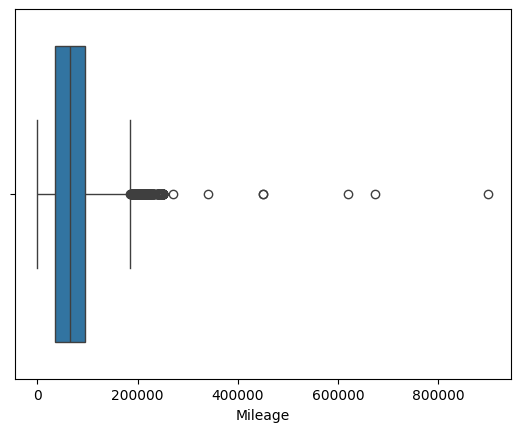

In [13]:
'''
-> Applied constraints to ensure data consistency:
    For year <= 2020: mileage must be within [2500, 250000]
    For year > 2020: no mileage restrictions
-> Removed rows violating these constraints
-> Visualized filtered data with a boxplot for oulier detection
'''

df_car = df_car[ ((df_car['Year'] <= 2020) & (df_car['Mileage'] >= 2500) &
                  (df_car['Mileage'] <= 250000)) | (df_car['Year'] > 2020)]

# Displaying a boxplot to visualize the distribution and identify outliers:
sns.boxplot(data=df_car, x='Mileage')

<Axes: xlabel='Mileage'>

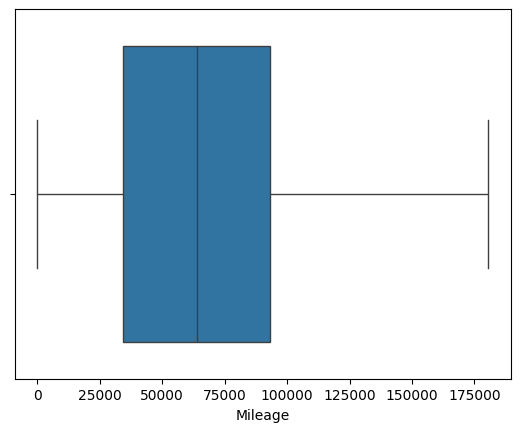

In [14]:
# Calculate the quartiles and IQR for the 'Mileage' feature:
Q1 = df_car['Mileage'].quantile(0.25)
Q3 = df_car['Mileage'].quantile(0.75)
IQR = Q3 - Q1

# Define the acceptable range for Mileage using the IQR method:
_min = Q1 - 1.5 * IQR
_max = Q3 + 1.5 * IQR

# Filter the DataFrame to exclude outliers based on the defined range:
df_car = df_car[(df_car['Mileage'] > _min) & (df_car['Mileage'] < _max)]

'''
After the first attempt to clean the outliers, there were still some outliers left,
so we will apply the IQR technique again to remove all the remaining ones as well
'''

Q1 = df_car['Mileage'].quantile(0.25)
Q3 = df_car['Mileage'].quantile(0.75)
IQR = Q3 - Q1

_min = Q1 - 1.5 * IQR
_max = Q3 + 1.5 * IQR

df_car = df_car[(df_car['Mileage'] > _min) & (df_car['Mileage'] < _max)]

# Display a boxplot to verify the removal of outliers:
sns.boxplot(data=df_car, x='Mileage')

#### HANDLING ENGINE CAPACITY FEATURE

In [15]:
'''
-> Remove the ' cc ' from Engine Capacity feature and convert it to integers.
-> Remove/Impute Data Entry Errors.
-> Imputing the NaN values with the values from Engine Capacity of the same Make and Model.
-> Round the values to the nearest multiple of 10.
-> Remove all the NaN values (mostly were of electric vehicles).
-> Remove all data entry errors as well

Note: This model does not account for fully electric vehicles.
'''

df_car['Engine Capacity'] = pd.to_numeric(df_car['Engine Capacity'].str.replace(' cc', ''))
df_car = df_car.copy()
df_car = df_car.dropna(subset=['Engine Capacity'])


# Create a copy of the DataFrame for modifications:
df_2 = df_car.copy()

# Set NaN for all vehicles with 'Engine Capacity' outside the reasonable range:
df_2.loc[(df_2['Engine Capacity'] < 600) | (df_2['Engine Capacity'] > 6700), 'Engine Capacity'] = np.NaN

# Identify rows where all values match except for 'Engine Capacity':
matching_rows = df_2.drop(columns=['Engine Capacity']).eq(df_car.drop(columns=['Engine Capacity'])).all(axis=1)

# Replace corresponding rows in df_car with modified rows from df_2:
df_car.loc[matching_rows, 'Engine Capacity'] = df_2.loc[matching_rows, 'Engine Capacity']

# Handle NaN values by filling them with values from 'Engine Capacity' of the same Make and Model:
df_car['Engine Capacity'] = df_car.groupby(['Make', 'Model'])['Engine Capacity'].transform(lambda x: x.fillna(method='bfill'))

# Drop all remaining rows with NaN values:
df_car = df_car.dropna()

# Round off the values of 'Engine Capacity' to the nearest full multiple of 10:
df_car['Engine Capacity'] = df_car['Engine Capacity'].round(-1)

# Convert 'Engine Capacity' to integer data type:
df_car['Engine Capacity'] = df_car['Engine Capacity'].astype(int)

<ipython-input-15-671ae58be344>:30: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_car['Engine Capacity'] = df_car.groupby(['Make', 'Model'])['Engine Capacity'].transform(lambda x: x.fillna(method='bfill'))


#### HANDLING ENGINE TYPE FEATURE

In [16]:
'''
Engine Type has null values.
    Handling those NaN values by imputing the data with the values
    from Engine Type of the same Make and Model.
Drop all the remaining rows with NaN.
'''

df_car['Engine Type'] = df_car.groupby(['Make', 'Model'])['Engine Type'].transform(lambda x: x.fillna(method='ffill'))
df_car = df_car.dropna()

<ipython-input-16-357d13c9657e>:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_car['Engine Type'] = df_car.groupby(['Make', 'Model'])['Engine Type'].transform(lambda x: x.fillna(method='ffill'))


#### HANDLING PRICE FEATURE

<Axes: xlabel='Price'>

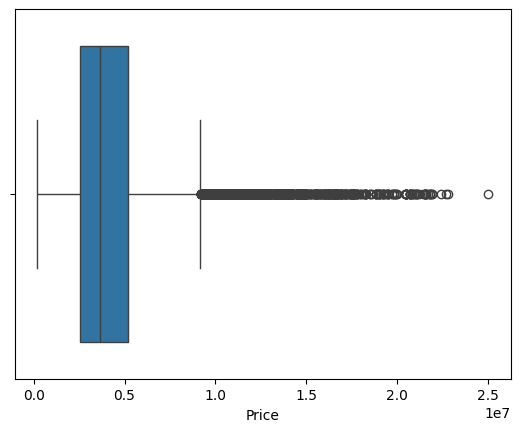

In [17]:
'''
Handling 'Call for Price' and other non-numeric values from Price prediction
   -> Remove the rows with 'Call for Price'
   -> Remove any non-numeric character from the feature

   -> After checking for typos, there are 3 rows that needed to be handled
   -> Placing a logical check that the price > 200K
'''

df_car = df_car.copy()

df_car = df_car[df_car['Price'] != 'Call for price']

df_car['Price'] = df_car['Price'].replace('[^\d.]', '', regex=True).astype(float).astype(int)

# Drop selected rows with incorrect prices (potential typos):
# df_car = df_car.drop([1697, 21648, 45815])

# Remove rows with price less than 200K and reset the index:
df_car = df_car[df_car['Price'] >= 200000].reset_index(drop=True)

# Display a boxplot to visualize the distribution of prices:
sns.boxplot(data=df_car, x='Price')

<Axes: xlabel='Price'>

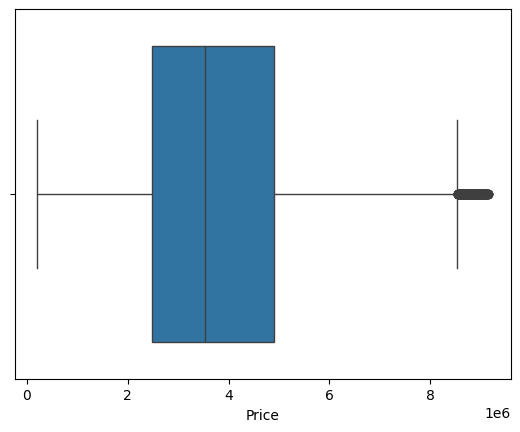

In [18]:
# Calculate the quartiles and IQR for the 'Price' feature:
Q1 = df_car['Price'].quantile(0.25)
Q3 = df_car['Price'].quantile(0.75)
IQR = Q3 - Q1

# Define the acceptable range for Price using the IQR method:
_min = Q1 - 1.5 * IQR
_max = Q3 + 1.5 * IQR

df_car = df_car[(df_car['Price'] > _min) & (df_car['Price'] < _max)]

df_car = df_car.reset_index(drop=True)

# Display a boxplot to verify the removal of outliers:
sns.boxplot(data=df_car, x='Price')

In [19]:
df_car

,Make,Model,Variant,Year,Mileage,Engine Capacity,Engine Type,Transmission,Registered City,Price
0,Toyota,Yaris,ATIV X CVT 1.5,2021,31000,1500,Petrol,Automatic,Karachi,4700000
1,Suzuki,Cultus,Auto Gear Shift,2021,89000,1000,Petrol,Automatic,Rawalpindi,3550000
2,Honda,City,1.3 i-VTEC,2015,152568,1300,Petrol,Manual,Lahore,3000000
3,Honda,Civic,Oriel 1.8 i-VTEC CVT,2019,114000,1800,Petrol,Automatic,Punjab,5590000
4,Toyota,Corolla,GLi Automatic 1.3 VVTi,2017,135000,1300,Petrol,Automatic,Islamabad,4250000
...,...,...,...,...,...,...,...,...,...,...
20415,Suzuki,Alto,VXR,2019,85000,660,Petrol,Manual,Lahore,2330000
20416,Honda,BR-V,i-VTEC S,2020,69500,1500,Petrol,Automatic,Islamabad,5120000
20417,Suzuki,Mehran,VXR Euro II,2015,144000,800,Petrol,Manual,Punjab,1280000
20418,Suzuki,Cultus,VXL,2018,90528,1000,Petrol,Manual,Sindh,2550000


There are a lot of Outliers when checked with the boxplot but after cafeful consideration, the vehicles justifies the price and therefore can not be considered as an outlier. In short, there are no Outliers in this feature.

#### GENERAL INFORMATION

In [20]:
print('Shape of Data Before Data Wrangling:', df.shape)
print('Shape of Data After Data Wrangling:', df_car.shape)
print()
print('Difference between Before and After:', df.shape[0] - df_car.shape[0])

Shape of Data Before Data Wrangling: (23494, 11)
Shape of Data After Data Wrangling: (20420, 10)

Difference between Before and After: 3074


In [21]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20420 entries, 0 to 20419
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Make             20420 non-null  object
 1   Model            20420 non-null  object
 2   Variant          20420 non-null  object
 3   Year             20420 non-null  int64 
 4   Mileage          20420 non-null  int64 
 5   Engine Capacity  20420 non-null  int64 
 6   Engine Type      20420 non-null  object
 7   Transmission     20420 non-null  object
 8   Registered City  20420 non-null  object
 9   Price            20420 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 1.6+ MB


In [22]:
df_car.describe()

,Year,Mileage,Engine Capacity,Price
count,20420.000000,20420.000000,20420.000000,2.042000e+04
mean,2018.580264,68789.826298,1315.977473,3.787822e+06
std,3.007227,40507.563406,406.945178,1.809830e+06
min,2013.000000,1.000000,600.000000,2.100000e+05
25%,2016.000000,38000.000000,1000.000000,2.480000e+06
50%,2019.000000,66000.000000,1300.000000,3.525000e+06
75%,2021.000000,95000.000000,1600.000000,4.900000e+06
max,2024.000000,180596.000000,3500.000000,9.150000e+06


#### SAVING THE CLEANED DATASET

In [23]:
df_car.to_csv('CleanedPakWheels.csv', index=False)

-------------------------------------------------------------------------------------------------------------------------------

### MODEL TRAINING AND TESTING

In [24]:
# Import necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [25]:
# read the cleaned dataset

data=pd.read_csv('CleanedPakWheels.csv')

In [26]:
# Defining independant features (X) and target variable (y)

X = data.drop('Price', axis=1)
y = data['Price']

In [27]:
# splitting dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=26)

In [28]:
numeric_features = ['Year', 'Mileage', 'Engine Capacity']
categorical_features = ['Make', 'Model', 'Variant', 'Engine Type', 'Transmission', 'Registered City']

# Create a pipeline for numeric feature transformation (scaling):
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Create a pipeline for categorical feature transformation (one-hot encoding):
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine numeric and categorical transformers into a single ColumnTransformer:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

#### MODEL 1 - Linear Regression Model

In [29]:
# Create a pipeline for the linear regression model, incorporating the previously defined preprocessor:
linear_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the linear regression model on the training data:
linear_model.fit(X_train, y_train)

# Make predictions on the test data using the trained model:
linear_predictions = linear_model.predict(X_test)

# Evaluate the linear regression model using various metrics:
linear_mae = mean_absolute_error(y_test, linear_predictions)
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_r2 = r2_score(y_test, linear_predictions)

# Print the metrics for linear regression model evaluation:
print('Linear Regression Metrics:')
print(f'Mean Absolute Error: {linear_mae}')
print(f'Mean Squared Error: {linear_mse}')
print(f'R-squared: {linear_r2}')

Linear Regression Metrics:
Mean Absolute Error: 218942.14687415404
Mean Squared Error: 102564923181.76114
R-squared: 0.968609978576033


#### MODEL 2 - Decision Tree Model

In [30]:
# Create a pipeline for the decision tree regression model, incorporating the previously defined preprocessor:
decision_tree_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=26))
])

# Fit the decision tree regression model on the training data:
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test data using the trained model:
decision_tree_predictions = decision_tree_model.predict(X_test)

# Evaluate the decision tree regression model using various metrics:
dt_mae = mean_absolute_error(y_test, decision_tree_predictions)
dt_mse = mean_squared_error(y_test, decision_tree_predictions)
dt_r2 = r2_score(y_test, decision_tree_predictions)

# Print the metrics for decision tree regression model evaluation:
print('Decision Tree Metrics:')
print(f'Mean Absolute Error: {dt_mae}')
print(f'Mean Squared Error: {dt_mse}')
print(f'R-squared: {dt_r2}')

Decision Tree Metrics:
Mean Absolute Error: 232610.33357236136
Mean Squared Error: 130973229357.03076
R-squared: 0.959915609080138


#### MODEL 3 - eXtreme Gradiant Boosting Model (XGBoost)

XGBoost is a powerful machine learning algorithm known for its efficiency and accuracy. It utilizes an ensemble of decision trees with regularization to prevent overfitting, making it effective in capturing complex relationships within data. In car price prediction projects, XGBoost's ability to handle non-linearity, efficiently process large datasets, and provide insights into feature importance makes it a popular choice for achieving accurate and robust predictions.

In [31]:
# Create a pipeline for the XGBoost regression model, incorporating the previously defined preprocessor:
xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(objective='reg:squarederror', random_state=26))
])

# Fit the XGBoost regression model on the training data:
xgb_model.fit(X_train, y_train)

# Make predictions on the test data using the trained model:
xgb_predictions = xgb_model.predict(X_test)

# Evaluate the XGBoost regression model using various metrics:
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)

# Print the metrics for XGBoost regression model evaluation:
print('XGBoost Metrics:')
print(f'Mean Absolute Error: {xgb_mae}')
print(f'Mean Squared Error: {xgb_mse}')
print(f'R-squared: {xgb_r2}')

XGBoost Metrics:
Mean Absolute Error: 175914.56277546522
Mean Squared Error: 75275066296.65285
R-squared: 0.9769620299339294


#### MODEL 4 - Light Gradiant Boosting Model (LGBM)

LightGBM is another gradient boosting framework like XGBoost, designed for efficiency and speed. It employs a tree-based learning approach and is particularly suitable for large datasets. LightGBM is known for its ability to handle categorical features efficiently, making it valuable in projects such as car price prediction where diverse types of features play a role. Its fast training speed and low memory usage contribute to its popularity, especially when dealing with extensive datasets and when quick model deployment is crucial.

In [32]:
# Create a pipeline for the LightGBM regression model, incorporating the previously defined preprocessor:
lgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LGBMRegressor(random_state=26))
])

# Fit the LightGBM regression model on the training data:
lgb_model.fit(X_train, y_train)

# Make predictions on the test data using the trained model:
lgb_predictions = lgb_model.predict(X_test)

# Evaluate the LightGBM regression model using various metrics:
lgb_mae = mean_absolute_error(y_test, lgb_predictions)
lgb_mse = mean_squared_error(y_test, lgb_predictions)
lgb_r2 = r2_score(y_test, lgb_predictions)

# Print the metrics for LightGBM regression model evaluation:
print('LightGBM Metrics:')
print(f'Mean Absolute Error: {lgb_mae}')
print(f'Mean Squared Error: {lgb_mse}')
print(f'R-squared: {lgb_r2}')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001443 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 597
[LightGBM] [Info] Number of data points in the train set: 16336, number of used features: 159
[LightGBM] [Info] Start training from score 3792811.257223
LightGBM Metrics:
Mean Absolute Error: 180436.15646956096
Mean Squared Error: 80879095044.54169
R-squared: 0.9752469319194041


#### MODEL COMPARISON

In [33]:
metrics = {
    'Model': ['Linear Regression', 'Decision Tree', 'XGBoost', 'LightGBM'],
    'MAE': [linear_mae, dt_mae, xgb_mae, lgb_mae],
    'MSE': [linear_mse, dt_mse, xgb_mse, lgb_mse],
    'R2': [linear_r2, dt_r2, xgb_r2, lgb_r2]
}

# Define a custom float format function
def float_format(x):
    return f'{x:.6f}'

# Create the DataFrame with custom float formatting
df_metrics = pd.DataFrame(metrics).set_index('Model').applymap(float_format)
df_metrics

<ipython-input-33-fdeb67c6e325>:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_metrics = pd.DataFrame(metrics).set_index('Model').applymap(float_format)


,MAE,MSE,R2
Model,,,
Linear Regression,218942.146874,102564923181.761139,0.968610
Decision Tree,232610.333572,130973229357.030762,0.959916
XGBoost,175914.562775,75275066296.652847,0.976962
LightGBM,180436.156470,80879095044.541687,0.975247


-------------------------------------------------------------------------------------------------------------------------------

### MODEL TESTING

In [34]:
# making "test" dataset
test = data.sample(n=60, random_state=42)
test.to_csv('test_.csv', index=False)

In [35]:
# Read the test dataset from the CSV file:
df = pd.read_csv('test_.csv')

# Separate features (X) and target variable (y) in the test dataset:
X = df.drop(['Price'], axis=1)
y = df['Price']

# Make predictions using the trained models on the test dataset:
linear_pred = linear_model.predict(df).astype(int)
dct_pred = decision_tree_model.predict(df).astype(int)
xgb_pred = xgb_model.predict(df).astype(int)
lgbm_pred = lgb_model.predict(df).astype(int)

# Create a DataFrame with the predicted prices from each model:
df_predictions = pd.DataFrame({
    'Linear Predicted Price': linear_pred,
    'DCT Predicted Price': dct_pred,
    'XGB Predicted Price': xgb_pred,
    'LGBM Predicted Price': lgbm_pred
})

# Concatenate the original test dataset with the predicted prices:
df = pd.concat([df, df_predictions], axis=1)

<Figure size 2000x1000 with 0 Axes>

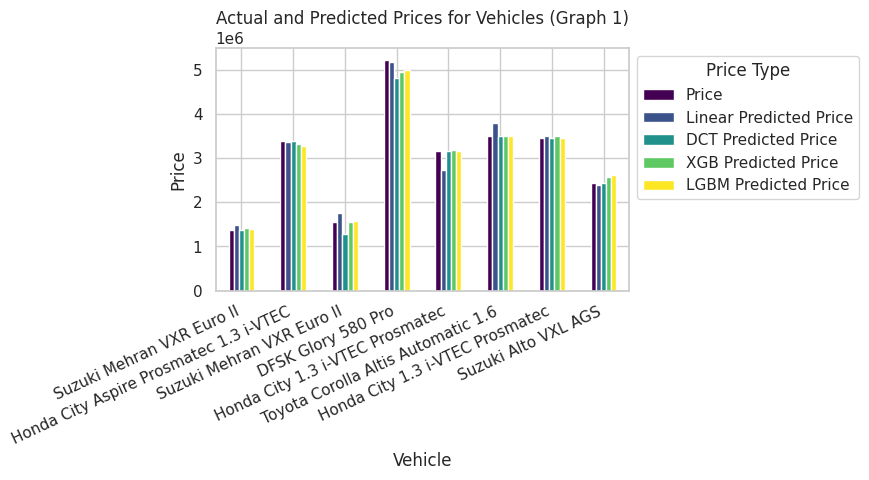

<Figure size 2000x1000 with 0 Axes>

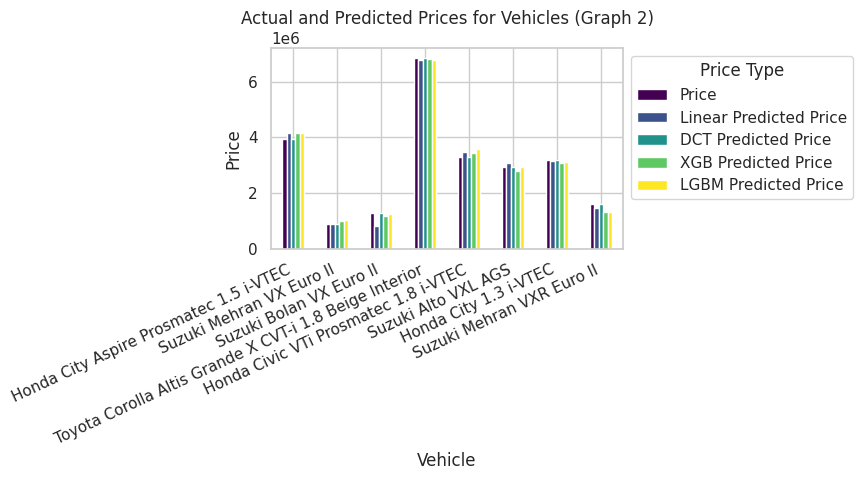

<Figure size 2000x1000 with 0 Axes>

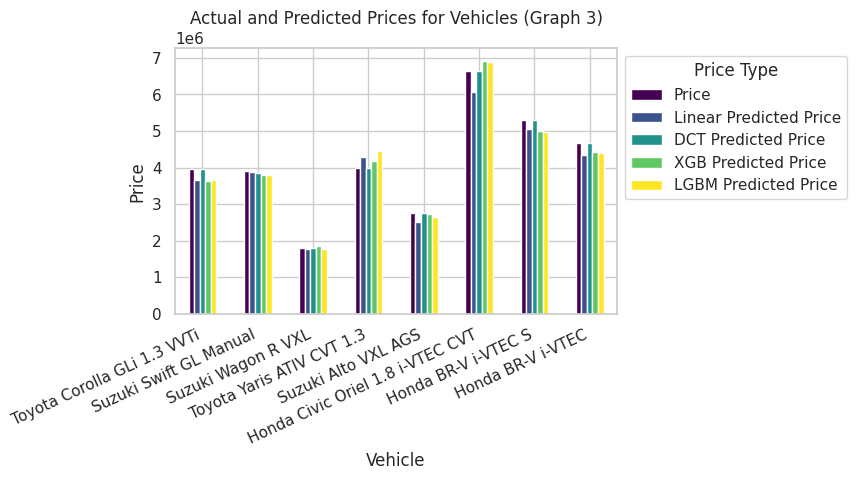

<Figure size 2000x1000 with 0 Axes>

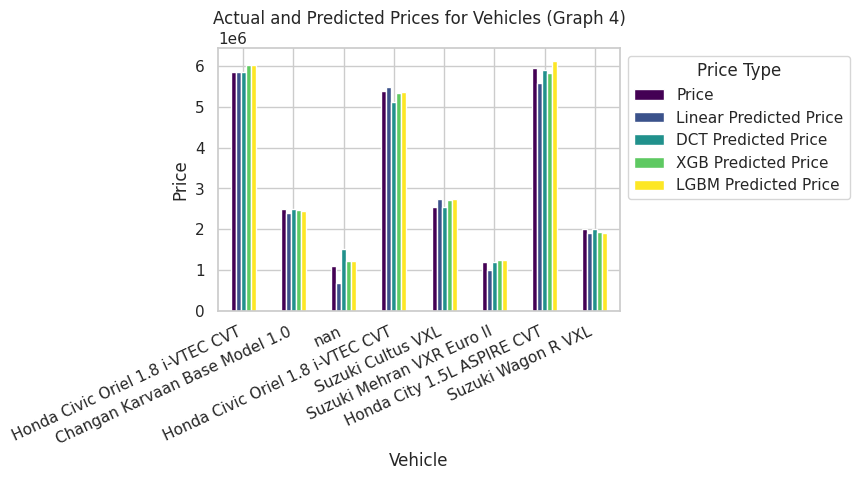

<Figure size 2000x1000 with 0 Axes>

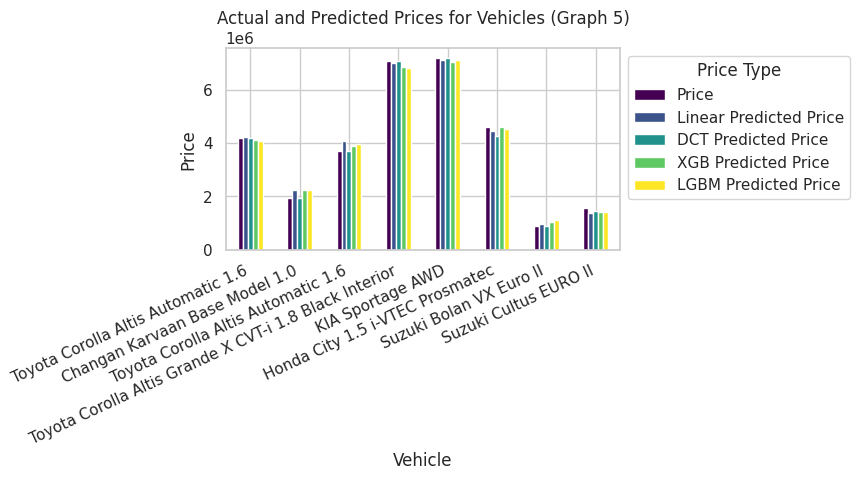

<Figure size 2000x1000 with 0 Axes>

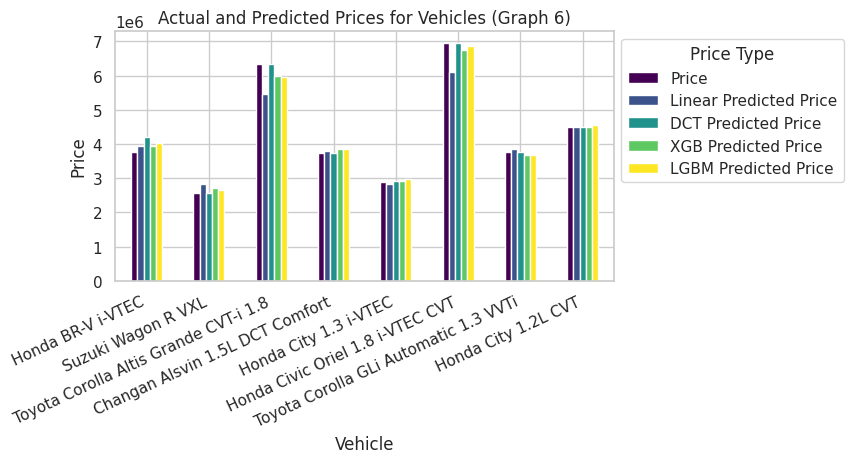

<Figure size 2000x1000 with 0 Axes>

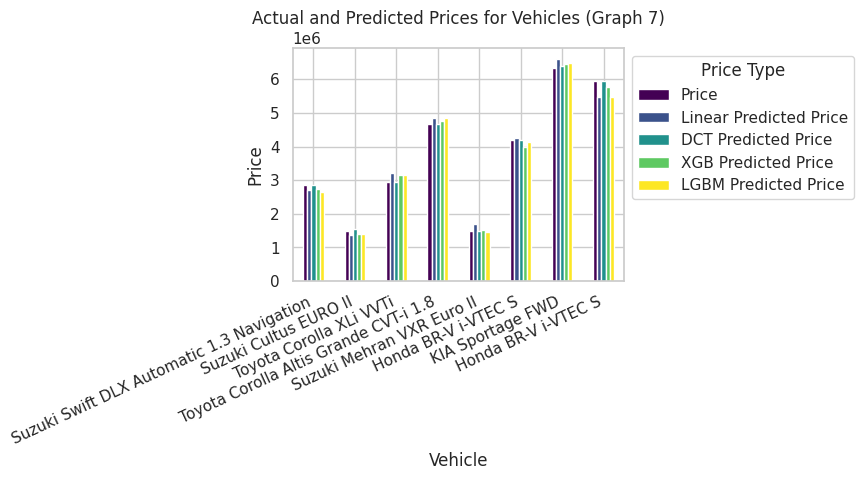

<Figure size 2000x1000 with 0 Axes>

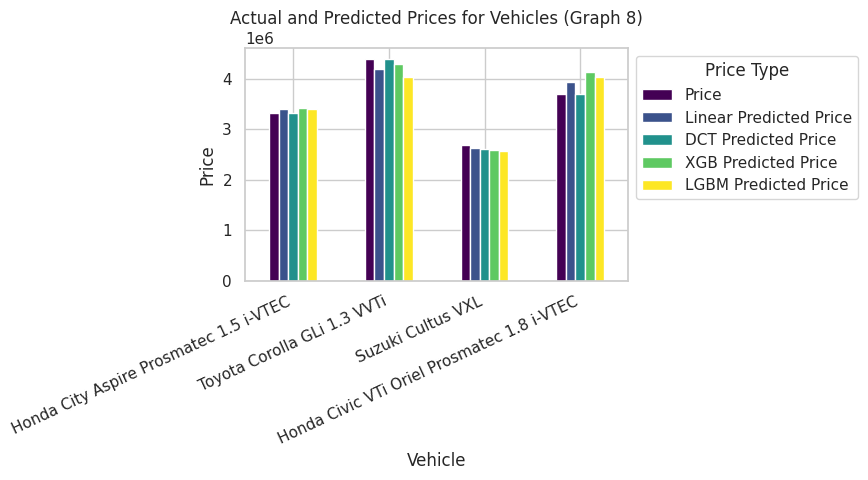

In [36]:
# Combine 'Make', 'Model', and 'Variant' into one string
df_predictions['Vehicle'] = df['Make'] + ' ' + df['Model'] + ' ' + df['Variant']
df_predictions['Price'] = df['Price']

# Select relevant columns for plotting
columns_to_plot = ['Vehicle', 'Price', 'Linear Predicted Price', 'DCT Predicted Price', 'XGB Predicted Price', 'LGBM Predicted Price']
df_plot = df_predictions[columns_to_plot]

# Set 'Vehicle' as the index for plotting
df_plot.set_index('Vehicle', inplace=True)

# Number of vehicles per graph
vehicles_per_graph = 8

# Calculate the number of graphs needed
num_graphs = len(df_plot) // vehicles_per_graph
if len(df_plot) % vehicles_per_graph != 0:
    num_graphs += 1

# Set the style for seaborn
sns.set(style="whitegrid")

# Plotting using seaborn
for i in range(num_graphs):
    start_idx = i * vehicles_per_graph
    end_idx = (i + 1) * vehicles_per_graph

    # Create a new figure and subplot for each group of 8 vehicles
    plt.figure(figsize=(20, 10))
    ax = df_plot.iloc[start_idx:end_idx].plot(kind='bar', stacked=False, colormap='viridis')
    plt.ylabel('Price')
    plt.title(f'Actual and Predicted Prices for Vehicles (Graph {i + 1})')
    plt.xticks(rotation=25, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()

    # Add legend with labels for each bar type
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, title="Price Type", loc="upper left", bbox_to_anchor=(1, 1))

    plt.show()

------------------------------------------------------------------------------------------------------------------------------

In [39]:
# Display the actual price and predicted prices for each model
df_predictions[['Vehicle', 'Price', 'Linear Predicted Price', 'DCT Predicted Price', 'XGB Predicted Price', 'LGBM Predicted Price']]

,Vehicle,Price,Linear Predicted Price,DCT Predicted Price,XGB Predicted Price,LGBM Predicted Price
0,Suzuki Mehran VXR Euro II,1375000,1488205,1375000,1425482,1390504
1,Honda City Aspire Prosmatec 1.3 i-VTEC,3375000,3367074,3375000,3326236,3262911
2,Suzuki Mehran VXR Euro II,1550000,1765673,1270000,1552283,1572846
3,DFSK Glory 580 Pro,5220000,5171269,4800000,4953144,4997628
4,Honda City 1.3 i-VTEC Prosmatec,3160000,2728809,3160000,3169737,3167852
5,Toyota Corolla Altis Automatic 1.6,3500000,3795431,3500000,3505426,3494271
6,Honda City 1.3 i-VTEC Prosmatec,3450000,3490313,3450000,3486150,3451816
7,Suzuki Alto VXL AGS,2430000,2398391,2430000,2578340,2619520
8,Honda City Aspire Prosmatec 1.5 i-VTEC,3935000,4152228,3935000,4163841,4171179
9,Suzuki Mehran VX Euro II,880000,899689,880000,1008281,1018691


### SAVE MODELS

In [40]:
import pickle

pickle.dump(linear_model, open('linear_model.pkl', 'wb'))
pickle.dump(decision_tree_model, open('decision_tree_model.pkl', 'wb'))
pickle.dump(xgb_model, open('xgb_model.pkl', 'wb'))
pickle.dump(lgb_model, open('lgb_model.pkl', 'wb'))